# Economic Data Analysis with Fred & Pandas
Pull The data, Visualize, discover insights... All with python/pandas!

This notebook was created as a youtube tutorial you can find on my channel [here](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw).

<img src="https://miro.medium.com/proxy/1*xR4m0oOKz_jRgQU4Oge53g.jpeg" width="500" height="200" />


In [1]:
!pip install fredapi > /dev/null

The system cannot find the path specified.


In [3]:
!pip install plotly 

     ---------------------------------------- 15.2/15.2 MB 2.2 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'put_your_key_here'

from kaggle_secrets import UserSecretsClient
secrets = UserSecretsClient()
fred_key = secrets.get_secret('fred-api')

OptionError: Pattern matched multiple keys

# 1. Create The Fred Object

In [ ]:
fred = Fred(api_key=fred_key)

# 2. Search for economic data!

In [ ]:
sp_search = fred.search('S&P', order_by='popularity')

In [ ]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-04-23,2022-04-23,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-04-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-04-22 09:20:02-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-04-23,2022-04-23,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-03-29 08:03:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2022-04-23,2022-04-23,S&P 500,2012-04-23,2022-04-22,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-04-22 19:10:56-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-04-23,2022-04-23,Real Median Household Income in the United States,1984-01-01,2020-01-01,Annual,A,2020 CPI-U-RS Adjusted Dollars,2020 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2021-09-15 08:45:01-05:00,82,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-04-23,2022-04-23,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-04-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-04-22 09:19:02-05:00,82,This data represents the effective yield of th...


# 3. Pull Raw Data & Plot

<AxesSubplot:title={'center':'S&P 500'}>

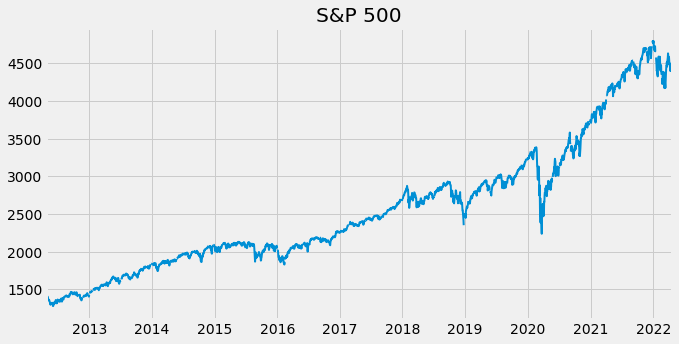

In [ ]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# 4. Pull and Join Multiple Data Series

In [ ]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
uemp_results = pd.concat(all_results, axis=1).drop(['M08310USM156SNBR','DSUR'], axis=1)

In [ ]:
uemp_states = uemp_results.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [ ]:
# Plot States Unemployment Rate
px.line(uemp_states)

# Pull April 2020 Unemployment Rate Per State

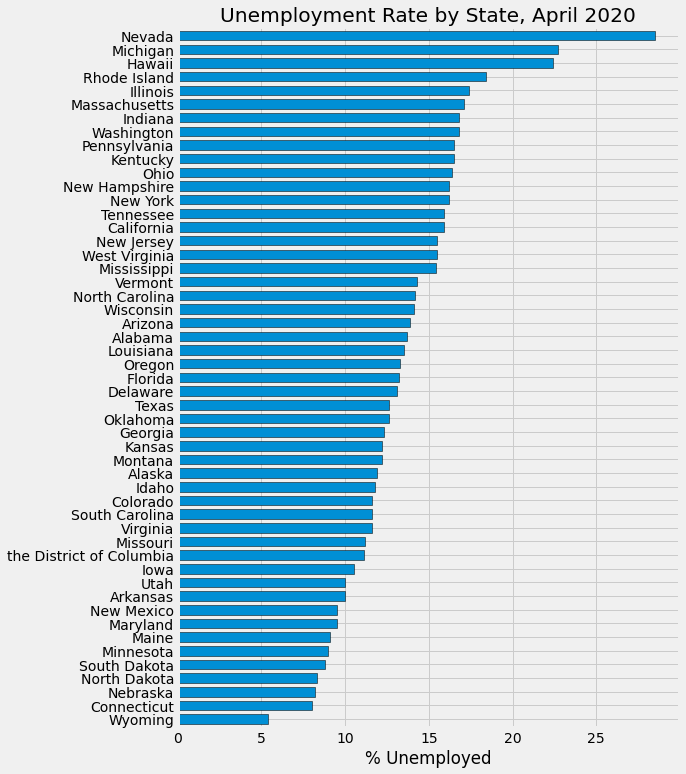

In [ ]:
ax = uemp_states.loc[uemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, April 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pull Participation Rate

In [ ]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Plot Unemployment vs Participation for each state!

In [ ]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

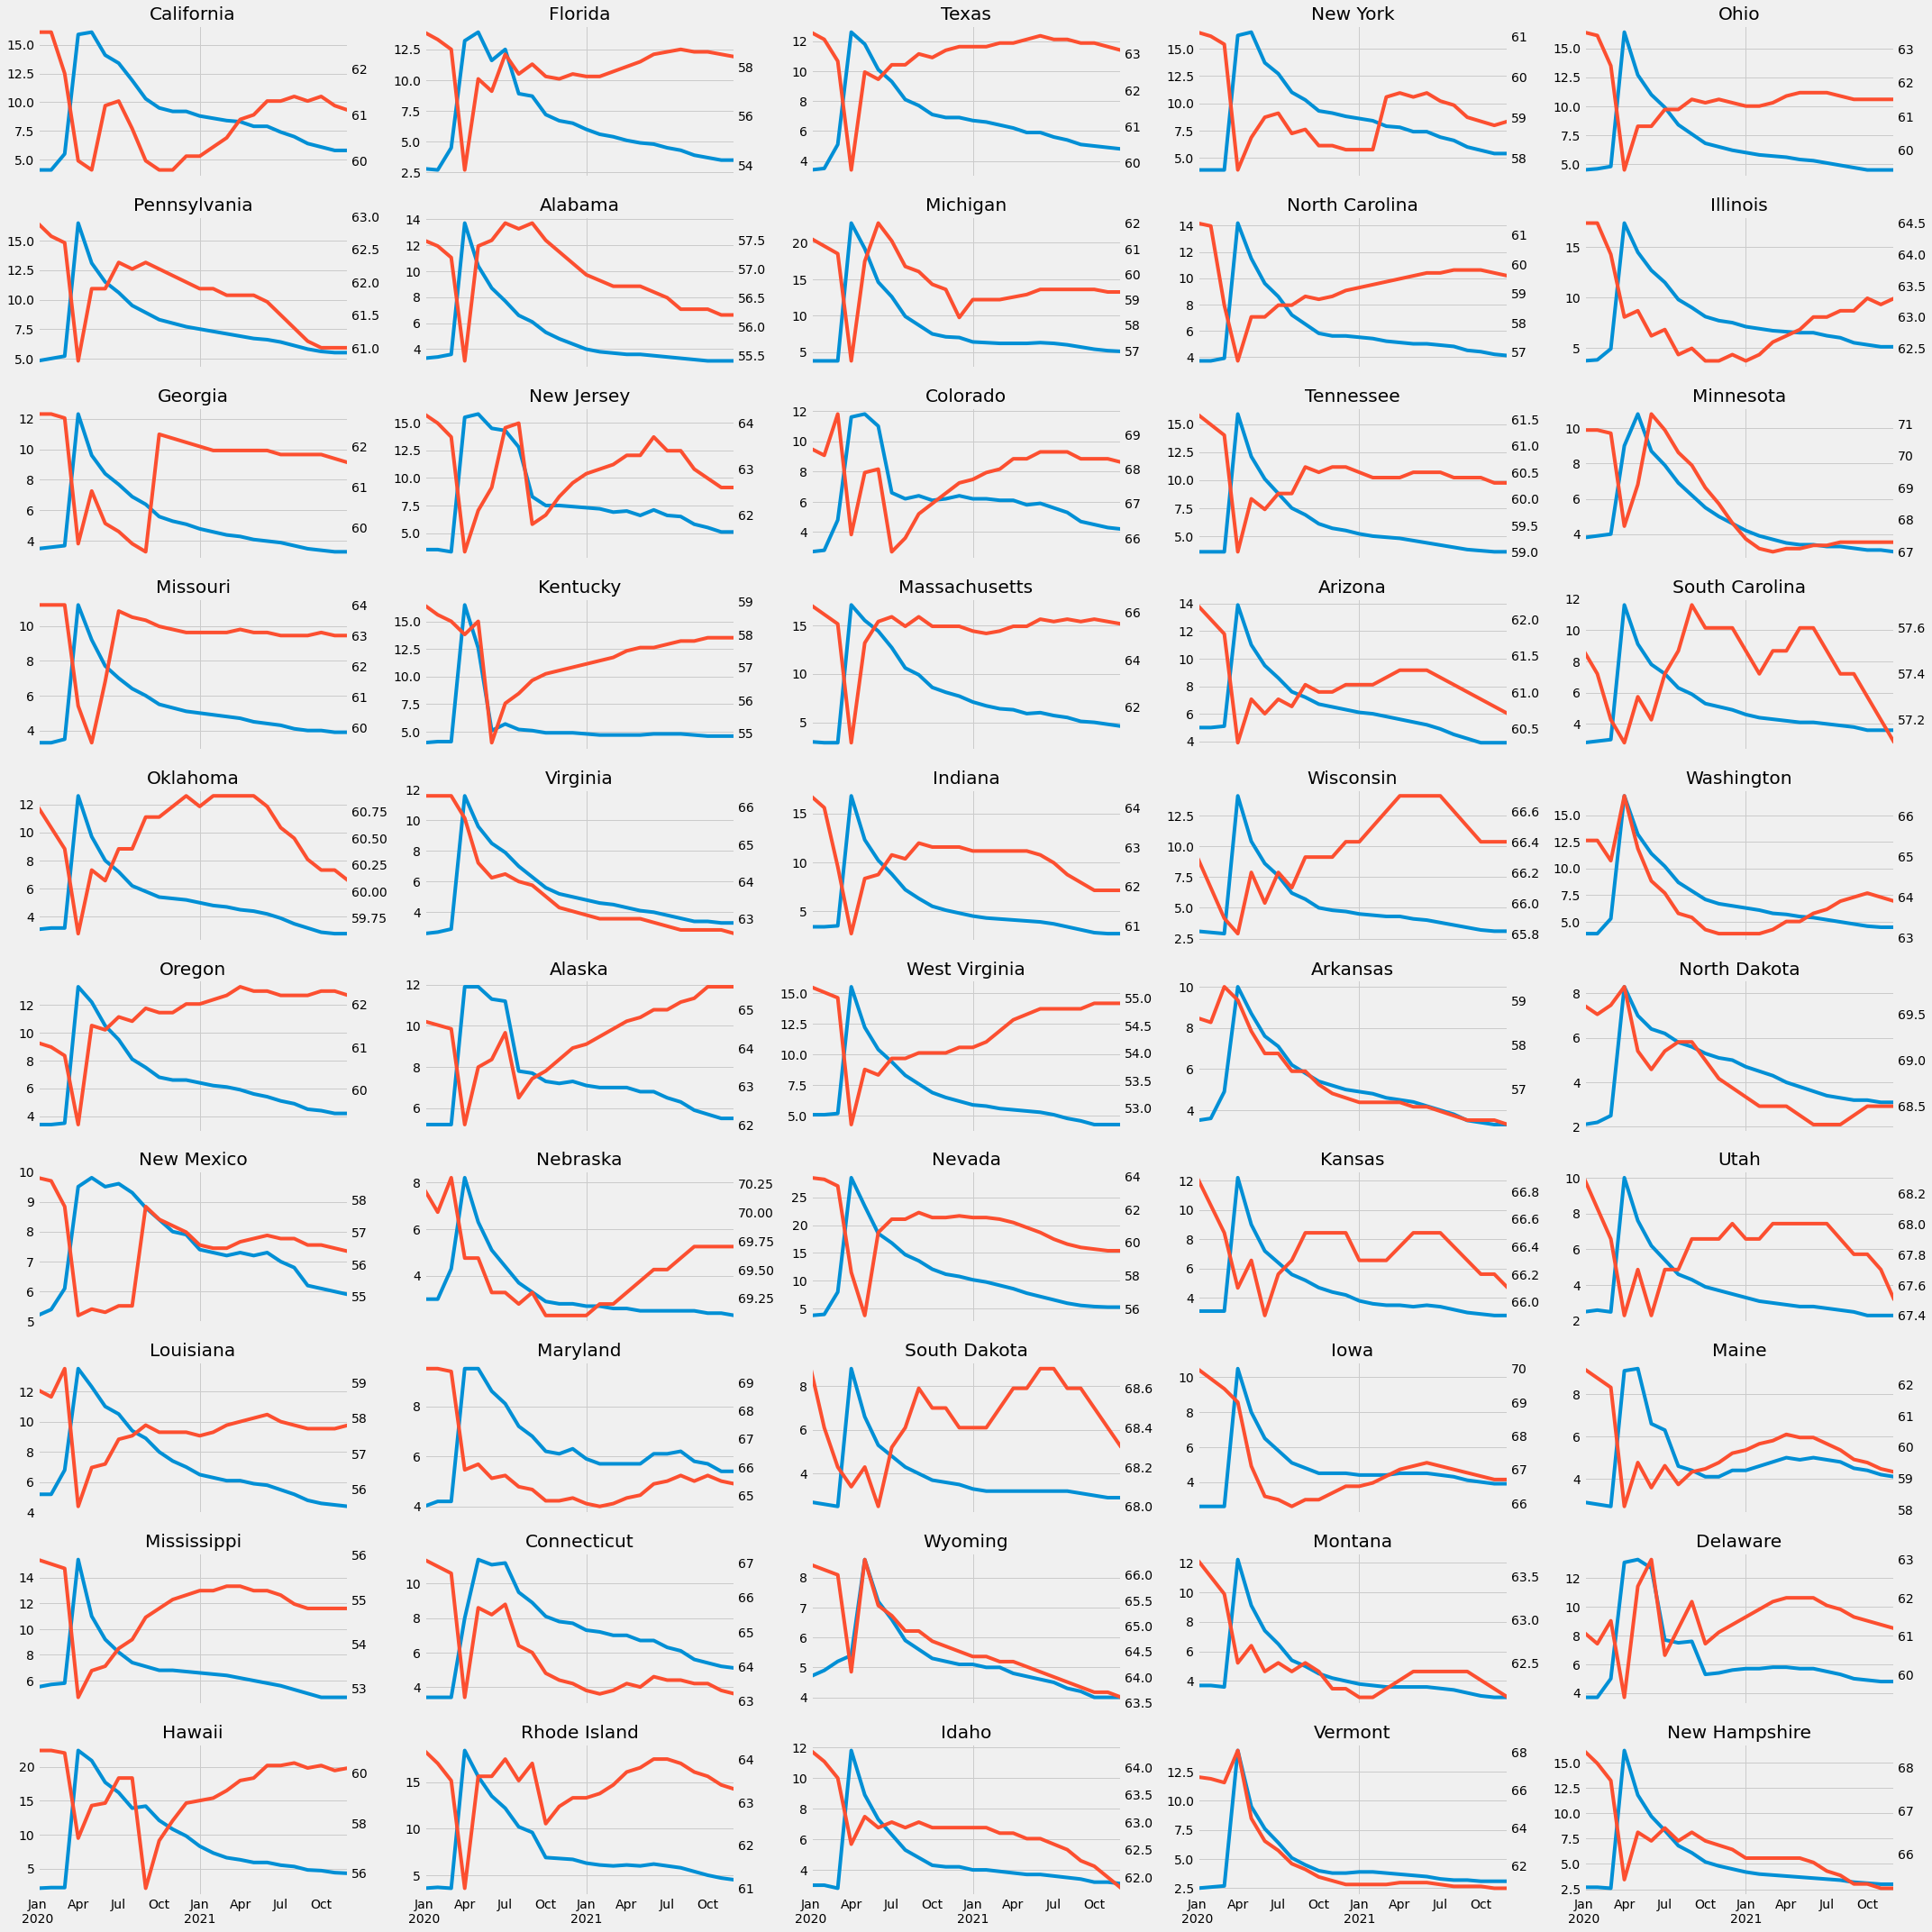

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state == "District Of Columbia":
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

# The End

Now you explore!